# Extraction de Keywords

## Imports

In [1]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

In [ ]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général", "bruxelles", "acte", "article", "conseiller communal", 
               "bourgmestre", "monsieur le bourgmestre", "le bourgmestre", "les échevins", "l'échevin", "la capitale", 
               "belgique", "loi", "législation", "le collège", "voix", "mandat", "séance", "administration", "commission", 
               "assemblée", "état", "ministre", "gouvernement", "public", "publique", "communal", "francs", "comité", 
               "membres", "conseil", "ville", "dépense", "rue", "échevin", "travaux", "adopte", "demande", "rapport", 
               "plan", "habitant", "projet", "section", "quartier", "secteur", "place", "travaux publics", "région", "régional", 
               "secteur public", "faire", "fait", "conseiller communal", "le bourgmestre", "fonds", "participation", "finances", 
               "service", "service public", "proposition", "rapport", "pouvoirs", "mesdames et messieurs", "collègues", "pouvoir compétent", 
               "principe", "assistance publique", "service technique", "autorisation", "question", "accord", "personnel", "compétent", 
               "monsieur", "madame", "avis", "considérant", "budget", "assistance publique", "bruxelles communal",
               "principe d'une", "d'une dépense", "bulletin communal", "d'une dépense", "d'assistance publique", "avis favorable"])
ignored

In [4]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [5]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [6]:
# Imprimer le nombre de fichiers identifiés
len(files)

2828

In [7]:
# Ne garder que les documents de l'année 1958
year_files = [f for f in files if f.startswith('Bxl_1958')]
len(year_files)

36

In [8]:
# Choisir un fichier
this_file = year_files[30]
this_file

'Bxl_1958_Tome_RptAn_Part_4.txt'

In [ ]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

In [ ]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

In [ ]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2 and kw.lower() not in ignored:
        kept.append(kw)
kept

## Faire la même opération sur tous les documents de 1958

In [ ]:
for f in sorted(year_files):
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

# Nuages de mots

## Imports et stopwords

In [16]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw += ["mois", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", 
       "septembre", "octobre", "novembre", "décembre", "art", "article", "bourgmestre", 
       "public", "publique","secteur", "proposition", "francs", "commission", "conseil", 
       "conseiller", "communal", "projet", "rue", "collège", "échevin", "état", "bruxelles", 
       "monsieur", "madame", "mesdames", "messieurs", "travaux", "service", "considérant",
       "question", "année", "budget", "dépense", "dépenses", "membres", "déjà", "quelque", "avis",
       "alors", "arrêté", "très", "intervention", "date", "toujours", "doivent", "certains", "concerne", "voudrais"]
sw = set(sw)

## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [18]:
# Choisir une année
year = 1958

In [20]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

In [21]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [22]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

36

In [23]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'PUBLICATION\nVILLE\n\nDE\n\nPERIODIQUE\nBRUXELLES\n\nAnnée 1958\n\nB U L L E T I N\nCOMMUNAL\nTOME\n\nII\n\nImpr. H . & M. S C H A U M A N S\nSociété\n\nAnonyme\n\nParvis Saint-Gilles, 41\nBruxelles\n1958\n\n\x0c\x0cN° 18\n\nC O M P '

In [24]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [25]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'PUBLICATION\nVILLE\n\nDE\n\nPERIODIQUE\nBRUXELLES\n\nAnnée 1958\n\nB U L L E T I N\nCOMMUNAL\nTOME\n\nII\n\nImpr. H . & M. S C H A U M A N S\nSociété\n\nAnonyme\n\nParvis Saint-Gilles, 41\nBruxelles\n1958\n\n\x0c\x0cN° 18\n\nC O M P T E R E N D U D E L A S E A N C E D U 7 JUILLET 1958\n\nVILLE\n\nDE\n\nBRUXELLES\n\nBULLETIN COMMUNAL\n(Publication\n\npériodique)\n\nAnnée 1958\n\nCONSEIL\n\nSéance\n\nCOMMUNAL\n\ndu 7 juillet\n\nPRESIDENCE DE M . LUCIEN\n\n1958.\n\nCOOREMANS,\n\nBourgmestre.\n\nSOMMAIRE :\nPages\n1. Communications\n2.\n\nQuel rôle joue Bruxelles dan'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage

In [26]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [27]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1958_clean.txt!'

In [28]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'publication periodique tome impr société anonyme parvis saint gilles bulletin publication périodique séance presidence lucien cooremans sommaire pages communications quel rôle joue communes europe schalckens welke zijn inzichten schepencollege tôt verwezenlijking historiaal brussel vraag schalckens séance ouverte quatorze heures cinquante minutes assiste début séance prescrits cooremans rons den heuvel merten vanden boeynants boeck leynseele piron echevins meulehroeck brunfaut vermeire thieleman'

## Nuage de mots

### Afficher les termes les plus fréquents

In [29]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('cours', 994), ('personnel', 894), ('part', 817), ('assistance', 710), ('ecole', 665), ('enfants', 636), ('élèves', 635), ('section', 616), ('prix', 583), ('compte', 578)]


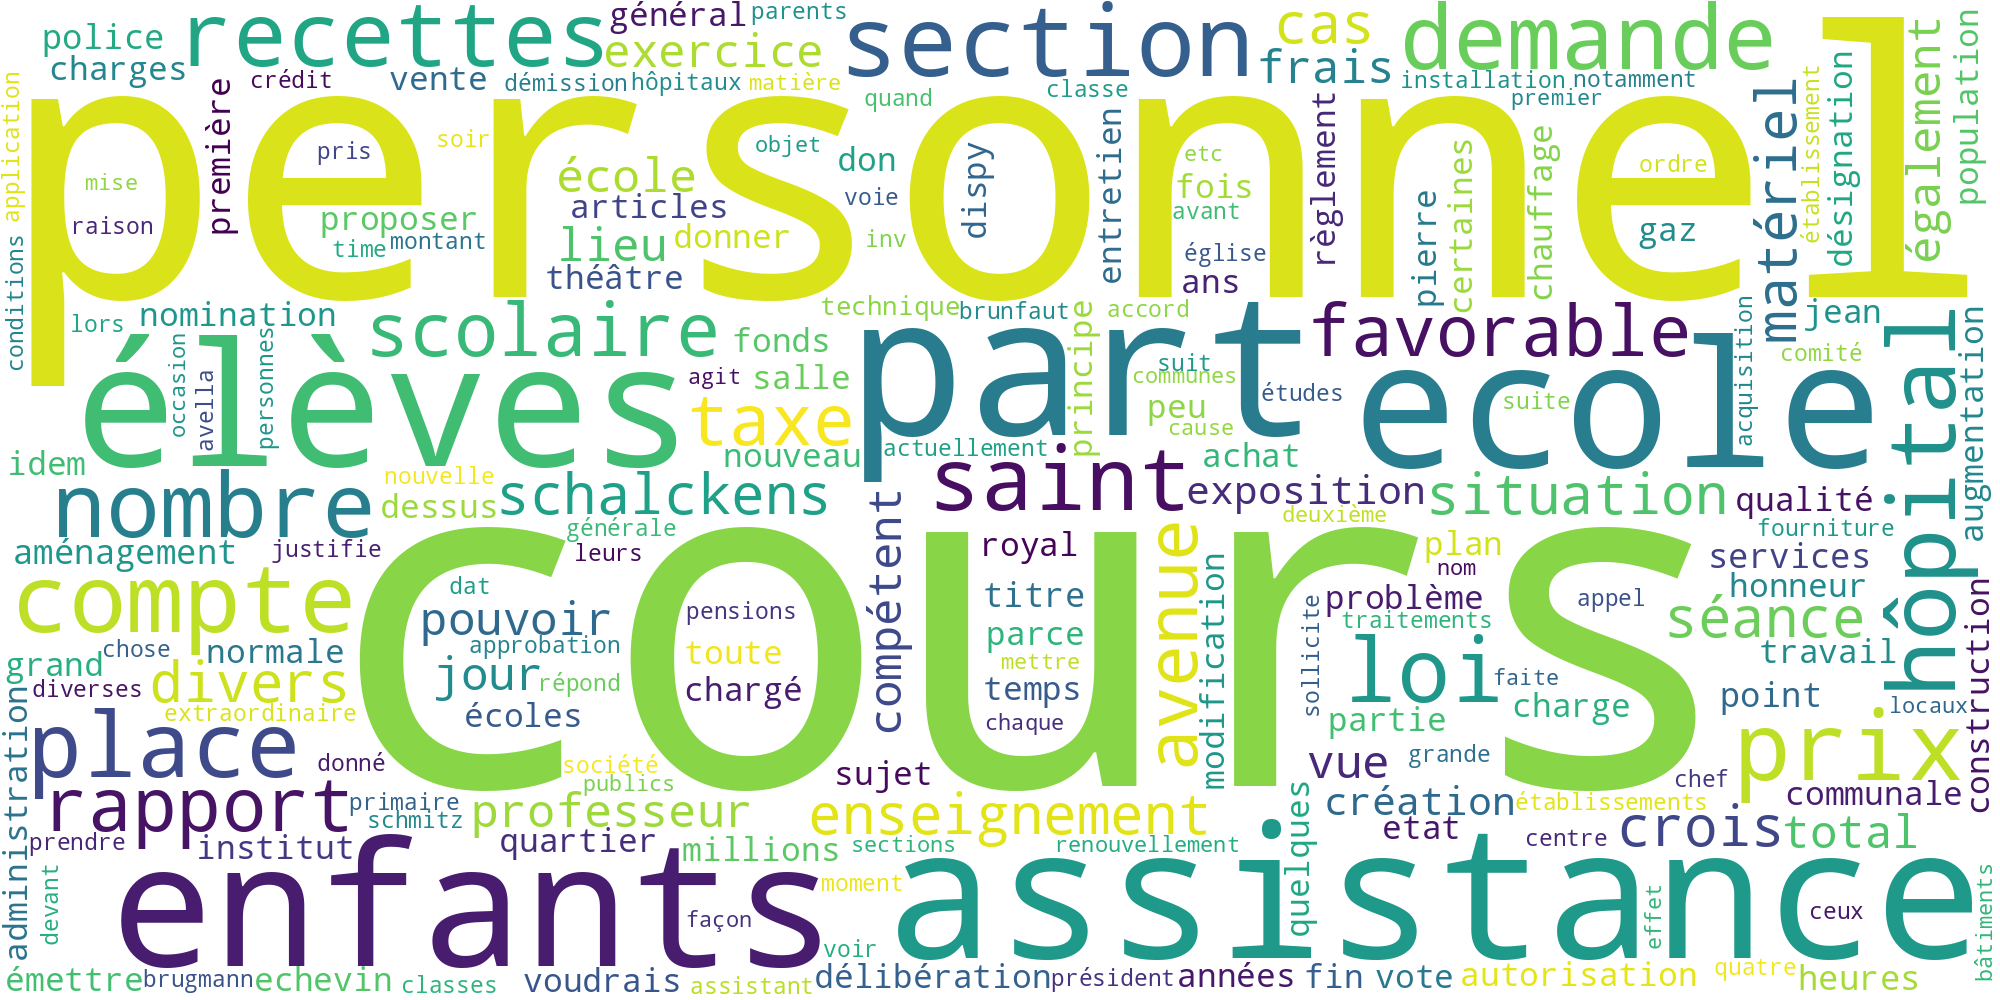

In [30]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [33]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

## Appliquer la reconnaissance d'entités nommées sur les documents de l'année 1958

In [79]:
# Charger le texte
n = 500000
text = open("../data/tmp/1958.txt", encoding='utf-8').read()
# La taille du corpus est trop importante pour la fonction "nlp", donc je sectionne ma liste en une liste de listes
# de 500,000 caractères qui pourront être interprétés par "nlp"
text_partitionned = [text[i * n:(i + 1) * n] for i in range((len(text) + n - 1) // n )]

In [80]:
# Compter les entités
people = defaultdict(int)
locations = defaultdict(int)
organisations = defaultdict(int)

In [82]:
%%time
for text_slice in text_partitionned:
    # Traiter le texte
    doc = nlp(text_slice)
    
    for ent in doc.ents:
        if ent.label_ == "PER" and len(ent.text) > 3:
            people[ent.text] += 1
        elif ent.label_ == "LOC" and len(ent.text) > 3:
            locations[ent.text] += 1
        elif ent.label_ == "ORG" and len(ent.text) > 3:
            organisations[ent.text] += 1
        

CPU times: user 31min 14s, sys: 1min 51s, total: 33min 6s
Wall time: 33min 9s


In [163]:
# Je crée une nouvelle liste de stopwords pour éviter que certains items apparaissent erronnément 
# dans la liste d'entités nommées.

sw_2 = stopwords.words("french")
sw_2 += ["q u e", "q u i", "considérant", "mesdames", "messieurs", "madame", "monsieur",
         "q u \' i", "q u \'", "u t r", "v o u", "u v e", "q u e", "q u \' i", "q u \' e",
        "r t i c", "q u \' u", "v o i r", "q u e l", "é t é" ]

In [ ]:
# Trier et imprimer
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)
sorted_locations = sorted(locations.items(), key=lambda kv: kv[1], reverse=True)
sorted_organisations = sorted(organisations.items(), key=lambda kv: kv[1], reverse=True)

for person in sorted_people:
    if person[0].lower() in sw_2:
       sorted_people.remove(person)
        
for person, freq in sorted_people[:20]:
    print(f"{person} apparait {freq} fois dans le corpus comme personne")
    
for location, freq in sorted_locations[:20]:
    print(f"{location} apparait {freq} fois dans le corpus comme lieu")
    
for organisation, freq in sorted_organisations[:20]:
    print(f"{organisation} apparait {freq} fois dans le corpus comme organisation")

# Sentiment analysis avec Textblob-FR

## Imports

In [166]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [190]:
nltk.download('punkt')
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Fonction

In [167]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment de 10 phrases sélectionnées de manière aléatoire

In [226]:
# Sectionner le document 1958.txt en une liste de phrases

text = open("../data/tmp/1958.txt", encoding='utf-8').read()

a_list = nltk.tokenize.sent_tokenize(text)

a_list = [sent for sent in a_list if len(sent) > 100]
a_list = [sent for sent in a_list if sent.count(" ") < 30]
a_list = [sent for sent in a_list if "\n" not in sent]

In [227]:
# Faire l'analyse de sentiment 
sentences = random.sample(a_list, 10) 
for sent in sentences:
    print(sent)
    get_sentiment(sent)

0 0 0 de francs prévue pour « Travaux divers de parachèvement du bâtiment administratif de la rue du Marché-auC h a r b o n ».
This text is 7% positive and 10% subjective.
D e p u i s deux ans le service poursuit la recherche systématique de ces fuites et le renouvellement des joints défectueux.
This text is neutral and perfectly objective.
Est-ce que le Collège est au courant des nouvelles tendancieuses concernant une vente du Palais d'Egmont ?
This text is 10% positive and 22% subjective.
Il ratifie la désignation de l'adjudicataire de la fourniture et du montage d ' u n tableau blindé H .
This text is neutral and perfectly objective.
Le produit de la vente sera converti en fonds d'Etat, en attendant un investissement possible en immeuble.
This text is neutral and 30% subjective.
U n e exposition permanente de jeux éducatifs, de marionnettes, de dessins, d'aquarelles, de travaux de bricolage a été organisée dans ces écoles.
This text is 20% positive and 45% subjective.
Je parle des g